<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">Lab3: การถดถอยลอจิสติก (Logistic Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้</h1> 

In [32]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [33]:
data = pd.read_csv('framingham.csv') # อ่านไฟล์ csv ชื่อ 'framingham.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก                               

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [34]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [35]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [36]:
# ตรวจสอบข้อมูลที่หายไปในแต่ละคอลัมน์
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [37]:
data.dropna(inplace=True) # ลบแถวที่มีข้อมูลสูญหายทั้งหมด
data = data.reset_index(drop=True) # จัดเรียง index ใหม่
data.isnull().sum().sum() # ตรวจสอบข้อมูลที่หายไปทั้งหมดที่เหลือ

0

In [38]:
len(data) # จำนวน sample ที่เหลือจากการ clean

3656

<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

0    3099
1     557
Name: TenYearCHD, dtype: int64


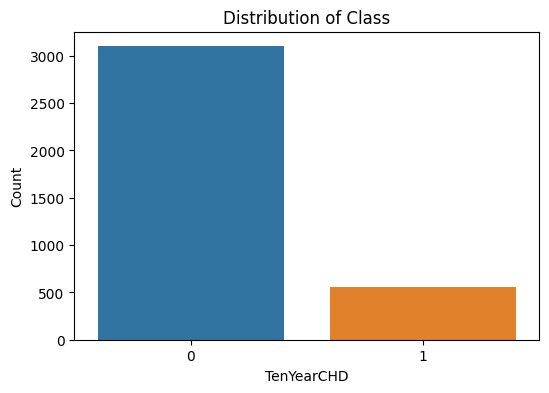

In [39]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'TenYearCHD'
class_counts = data['TenYearCHD'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'TenYearCHD'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='TenYearCHD')
plt.title('Distribution of Class')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

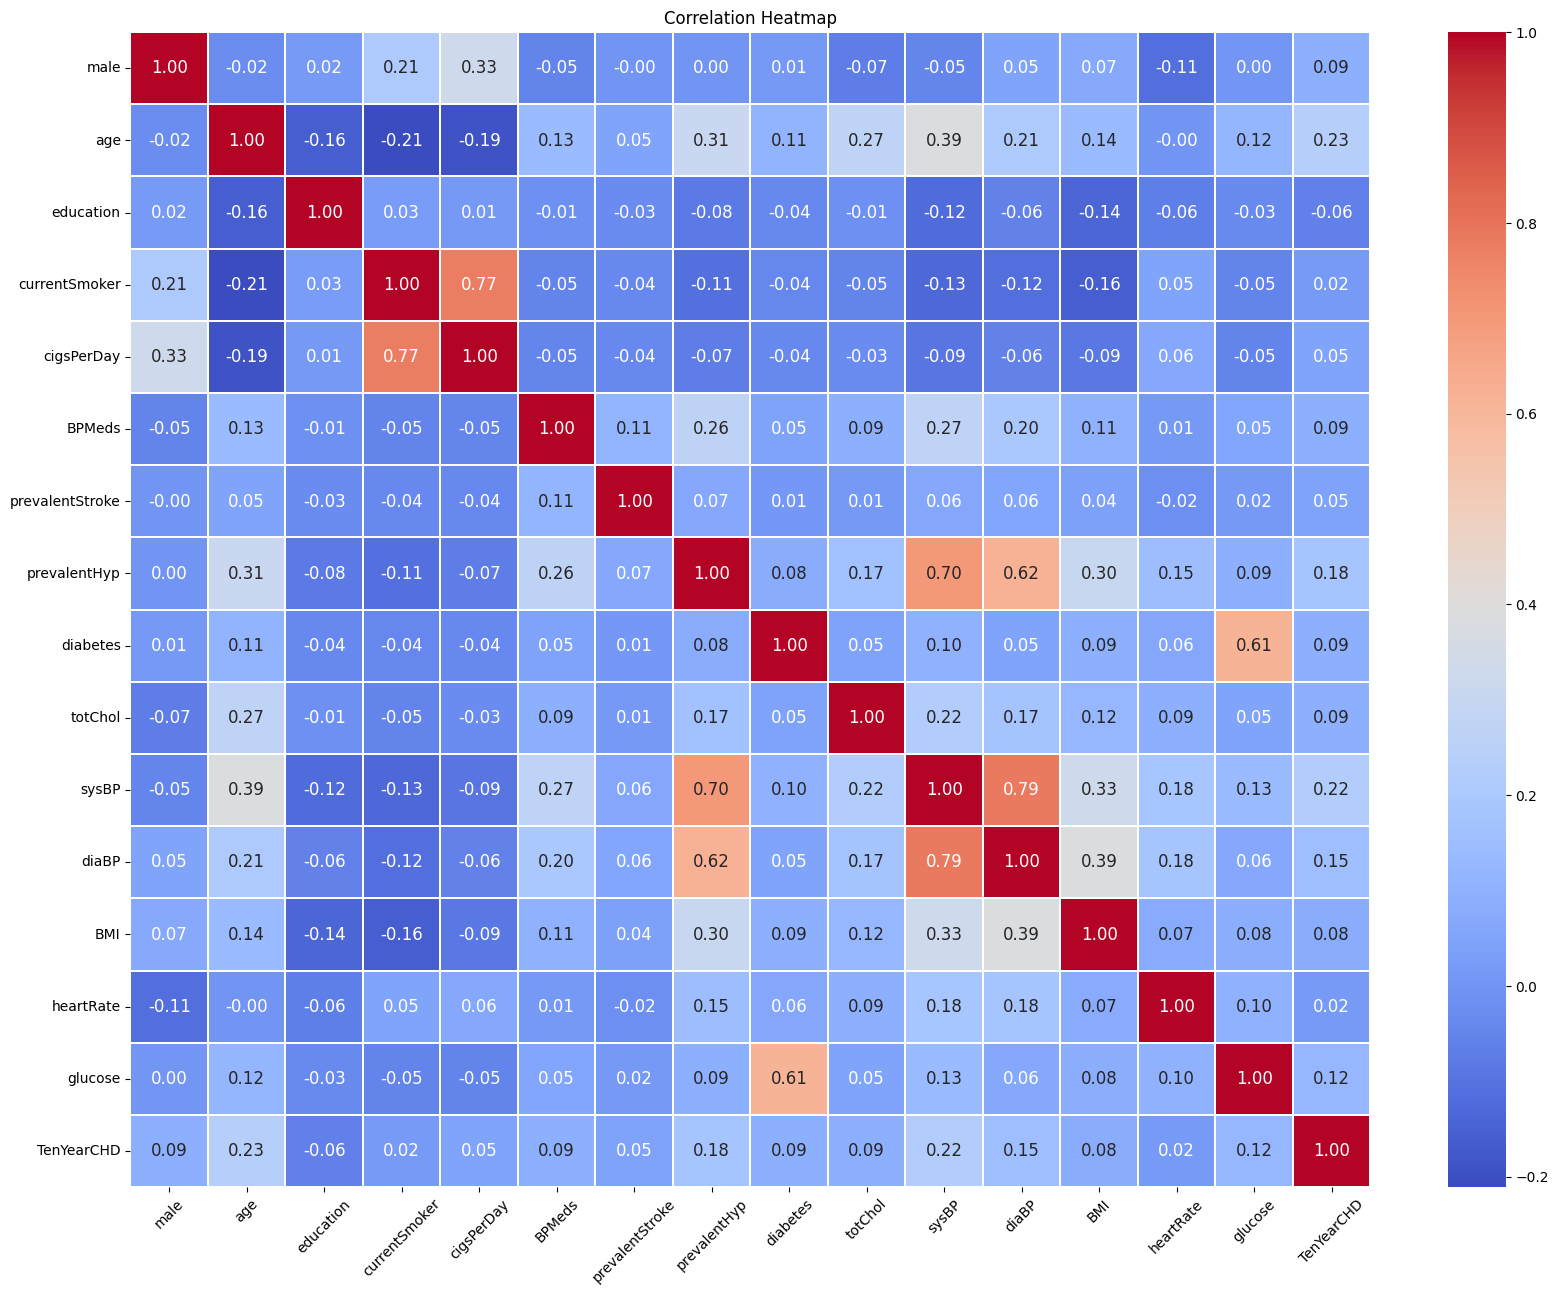

In [40]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(20, 15)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.1, annot_kws={"size": 12}) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.xticks(rotation = 45) # หมุนตัวอีกษรแกน x เพื่อให้อ่านง่ายขึ้น
plt.show() # แสดงผล

In [41]:
data.corr().TenYearCHD.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'TenYearCHD' จากมากไปน้อย

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับช่วงของข้อมูล (Feature Scaling)</h1>

In [42]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [43]:
# X เป็น Features
X = data.drop('TenYearCHD', axis=1)
# y เป็น Label
y = data['TenYearCHD']

<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features ที่ต้องการ</h1>


In [44]:
# ลิสต์ของคอลัมน์ที่เราจะทำการ Feature Scaling
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [45]:
X_scaled = X.copy()
# ทำการ standardize ข้อมูลในส่วนที่เราต้องการจะทำ
X_scaled[numerical_features] = pre_process.fit_transform(X[numerical_features])
# แสดงผล 5 บรรทัดแรก
X_scaled.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.233351,4.0,0,-0.757068,0.0,0,0,0,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,0,-0.415591,2.0,0,-0.757068,0.0,0,0,0,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,1,-0.181945,1.0,1,0.921174,0.0,0,0,0,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,0,1.336754,3.0,1,1.760294,0.0,0,1,0,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,0,-0.415591,3.0,1,1.172910,0.0,0,0,0,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505


In [46]:
print(type(X_scaled)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [47]:
X_scaled = np.array(X_scaled)  # เปลี่ยน type ของ X_scaled ให้เป็น array
y = np.array(y)  # เปลี่ยน type ของ y ให้เป็น array
print(type(X_scaled)) ; print(type(y)) # แสดง type ของ X_scaled และ y ในตอนนี้

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [48]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [49]:
# แบ่งส่วนข้อมูล X_scaled เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=42, stratify=y)

In [50]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 2559 , length of X_test: 1097


In [51]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (2559, 15)
shape of X_test: (1097, 15)
shape of y_train: (2559,)
shape of y_test: (1097,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Logistic Regression model</h1>

Logistic Regression คือการวิเคราะห์ทางสถิติที่ใช้ในการทำนายผลของตัวแปรตาม (dependent variable) ที่เป็นทวิภาค จากตัวแปรต้นหนึ่งตัวหรือมากกว่า ที่เป็นตัวแปรต่อเนื่องหรือตัวแปรประเภท (categorical variable) โดยตัวแปรตามที่เป็นทวิภาคนั้น มีค่าที่เป็นไปได้แค่ 2 ค่า เช่น 0 และ 1 

สมการของ Logistic Regression สามารถเขียนได้ดังนี้:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p)}} $$

โดยที่:
- $ P(Y=1|X) $ คือความน่าจะเป็นที่ตัวแปรตาม $ Y $ จะเป็น 1 หากทราบค่าของตัวแปรต้น $ X $
- $ e $ คือฐานของลอการิทึมธรรมชาติ
- $ \beta_0, \beta_1, \beta_2, \ldots, \beta_p $ คือพารามิเตอร์ของโมเดลที่ต้องการประมาณค่า
- $ X_1, X_2, \ldots, X_p $ คือตัวแปรต้น

เราจะใช้ความน่าจะเป็นที่ได้จากโมเดลเพื่อจำแนกประเภท โดยกำหนดขีดแบ่ง (threshold) ที่ใช้เพื่อตัดสินใจว่าควรจะจัดแต่ละตัวอย่างเข้าไปในคลาสไหน


In [52]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ LogisticRegression
from sklearn.linear_model import LogisticRegression

<h1 style="font-size: 18px;">4.1 สร้างโมเดลและเทรนโมเดล</h1>

In [53]:
model = LogisticRegression()  # สร้างโมเดล Logistic Regression โดยเก็บไว้ที่ตัวแปร model

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LogisticRegression()

In [54]:
model.coef_ # ค่า w ของ Feature ที่ 1,2,3,4 และ 5 ที่ได้จากการเทรนโมเดล

array([[ 0.47810526,  0.5177839 , -0.09042083,  0.04305252,  0.20462494,
        -0.01359924,  0.41074544,  0.24707845,  0.03496932,  0.13445332,
         0.31708452, -0.01143878,  0.0354659 , -0.05541497,  0.16129114]])

In [55]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

array([-2.12761132])

<h1 style="font-size: 18px;"">4.2 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [56]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[1 0 0 ... 0 0 0]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [57]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

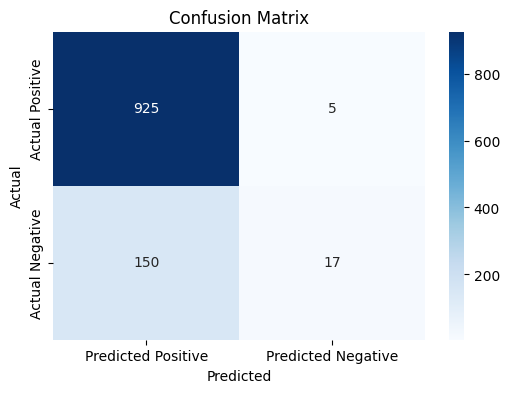

In [58]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Positive", "Predicted Negative"],
            yticklabels=["Actual Positive", "Actual Negative"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

จาก Confusion Matrix ด้านบน เราจึงได้ว่า
<div style=" border-radius: 5px; display: flex; align-items: center;">
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Positive (TP) = 925</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Positive (FP) = 150</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Negative (FN) = 5</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Negative (TN) = 17</h1>
</div>

<h1 style="font-size: 18px; font-weight: bold;">5.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">5.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [59]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [60]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision:.4f}")
print(f"ความครอบคลุม (Recall): {recall:.4f}")
print(f"คะแนน F1 (F1-Score): {f1:.4f}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.8587
ความแม่นยำของการทำนายคลาสบวก (Precision): 0.7727
ความครอบคลุม (Recall): 0.1018
คะแนน F1 (F1-Score): 0.1799
ค่าสหสัมพันธ์แมทธิว (MCC): 0.2471


<h1 style="font-size: 18px; font-weight: bold;">5.6 Classification Report</h1>

In [61]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [62]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       930
           1       0.77      0.10      0.18       167

    accuracy                           0.86      1097
   macro avg       0.82      0.55      0.55      1097
weighted avg       0.85      0.86      0.81      1097

